## **House Price - Advance Regressions Techniques**

### **Predicting House Prices with Machine Learning**

#### **Introduction**
This project tackles the challenge of predicting house prices by analyzing various features that influence property values. The objective is to create a model that accurately predicts house prices, benefiting both buyers and sellers.

#### **Project Workflow**

1. **Understanding the Client and Their Problem**
   - **House Buyer**: Seeks a fair price for their dream home, interested in how features like bathrooms and location impact the price.
   - **House Seller**: Aims to maximize house value by investing in features that offer the highest return, like expanding living space.

2. **Loading Data and Packages**
   - Import necessary libraries and datasets.
   - Perform initial checks to understand the data structure.

3. **Analyzing the Target Variable (Sale Price)**
   - Explore the distribution and characteristics of the sale price.
   - Use statistical measures to assess normality.

4. **Multivariable Analysis**
   - **Categorical vs. Numerical Features**: Identify and categorize features.
   - **Correlation Analysis**: Use a correlation matrix and heatmaps to find key features related to the sale price.

5. **Feature Engineering**
   - Clean and analyze top features like Overall Quality and Living Area.
   - Remove outliers and transform data as needed.

6. **Impute Missing Data and Clean Data**
   - Identify and logically impute missing values based on observed patterns.

7. **Feature Transformation and Engineering**
   - Scale numerical features, encode categorical variables, and create new features.

8. **Modeling and Predictions**
   - Experiment with machine learning models like Linear Regression, Random Forest, and XGBoost.
   - Fine-tune and evaluate models, selecting the best performer.

**Conclusion**
   - Summarize findings and model effectiveness.
   - Highlight how the model can assist both buyers and sellers in making informed decisions.

### **Step:-1. Loading Data and Packages**
- ##### **Pandas** is used for data manipulation and analysis.
- ##### **Numpy** is used for numerical operations on arrays and matrices.
- ##### **Seaborn** is used for statistical data visualization.
- ##### **Matplotlib** is used for creating static, animated, and interactive visualizations.
- ##### **XGBoost** is an optimized gradient boosting library designed for speed and performance.
- ##### **LightGBM** is a gradient boosting framework that uses tree-based learning algorithms.
- ##### **Imports the skew and norm functions from the scipy.stats module,** which are used for statistical analysis.
- ##### **Imports the stats module from scipy,** which contains a large number of probability distributions and statistical functions.
- ##### **LassoCV:** Performs Lasso regression with cross-validation to select the best regularization parameter.
- ##### **Ridge:** Performs Ridge regression to prevent overfitting by adding a penalty to the loss function.
- ##### **ElasticNetCV:** Combines Lasso and Ridge regression with cross-validation to select the best parameters.from sklearn.linear_model import LassoCV, Ridge, ElasticNetCV
- ##### **GridSearchCV:** Searches over specified parameter values for an estimator using cross-validation.
- ##### **cross_val_score:** Evaluates a model’s performance using cross-validation.from sklearn.model_selection import GridSearchCV, cross_val_score
- ##### **RandomForestRegressor:** Fits multiple decision trees on sub-samples and averages results to improve accuracy.
- ##### **GradientBoostingRegressor:** Builds an additive model to optimize for a differentiable loss function.
- ##### **StandardScaler** which is used to standardize features by removing the mean and scaling to unit variance.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew, norm
from scipy import stats
from sklearn.linear_model import LassoCV, Ridge, ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Imports the warnings library, which is used to handle warnings in the code.
import warnings
# Ignoring warnings for cleaner output
warnings.filterwarnings('ignore')

# Setting the style for plots
sns.set(style='white', context='notebook', palette='deep')

# Display plots in high resolution
%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

In [3]:
# Loading the training and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
# Display the five rows of the train dataset
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# print the all columns names of the train dataset
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Display the five rows of the test dataset
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# print the all columns names of the test dataset
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Displaying the shape of the datasets before dropping the 'Id' column
print(f"The train data size before dropping Id feature is: {train_data.shape}")
print(f"The test data size before dropping Id feature is: {test_data.shape}")

The train data size before dropping Id feature is: (1460, 81)
The test data size before dropping Id feature is: (1459, 80)


In [9]:
# Saving the 'Id' column for later use
train_ID = train_data['Id']
test_ID = test_data['Id']

# Dropping the 'Id' column as it is not needed for predictions
train_data.drop(columns = "Id", inplace = True)  # train_data.drop("Id",axis = 1, inplace=True)  
test_data.drop(columns = "Id", inplace=True)   # test_data.drop("Id",axis = 1, inplace=True)

In [10]:
# Displaying the shape of the datasets after dropping the 'Id' column
print(f"\nThe train data size after dropping Id feature is: {train_data.shape}") 
print(f"The test data size after dropping Id feature is: {test_data.shape}")


The train data size after dropping Id feature is: (1460, 80)
The test data size after dropping Id feature is: (1459, 79)


### **Step:-2. Analyzing the Target Variable (Sale Price)**
- **Let's examine the 'SalePrice' to understand its distribution and key statistics.**


In [11]:
# Displaying the summary statistics of 'SalePrice'
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

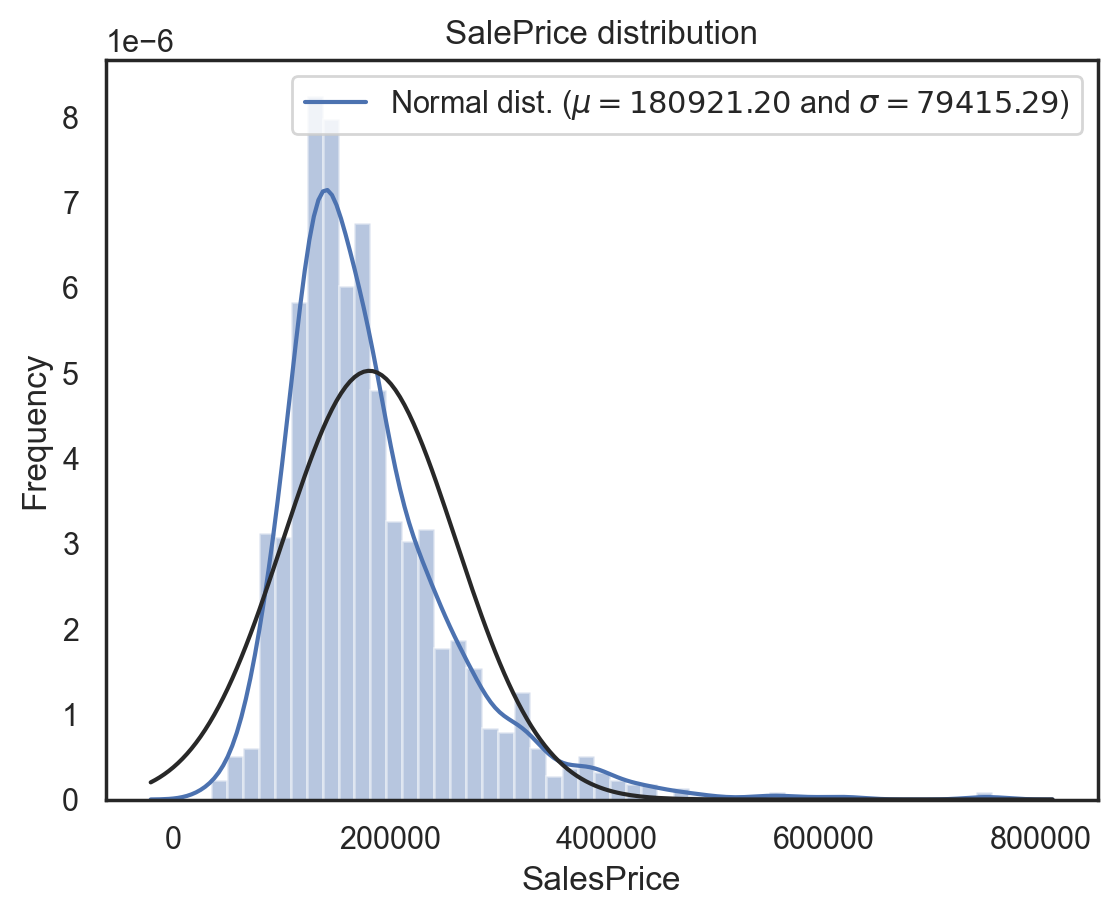

In [12]:
# Plotting the distribution of 'SalePrice'
sns.distplot(train_data['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train_data['SalePrice'])
plt.legend([f'Normal dist. ($\mu={mu:.2f}$ and $\sigma={sigma:.2f}$)'], loc='best')
plt.ylabel("Frequency")
plt.xlabel("SalesPrice")
plt.title('SalePrice distribution')
plt.show()


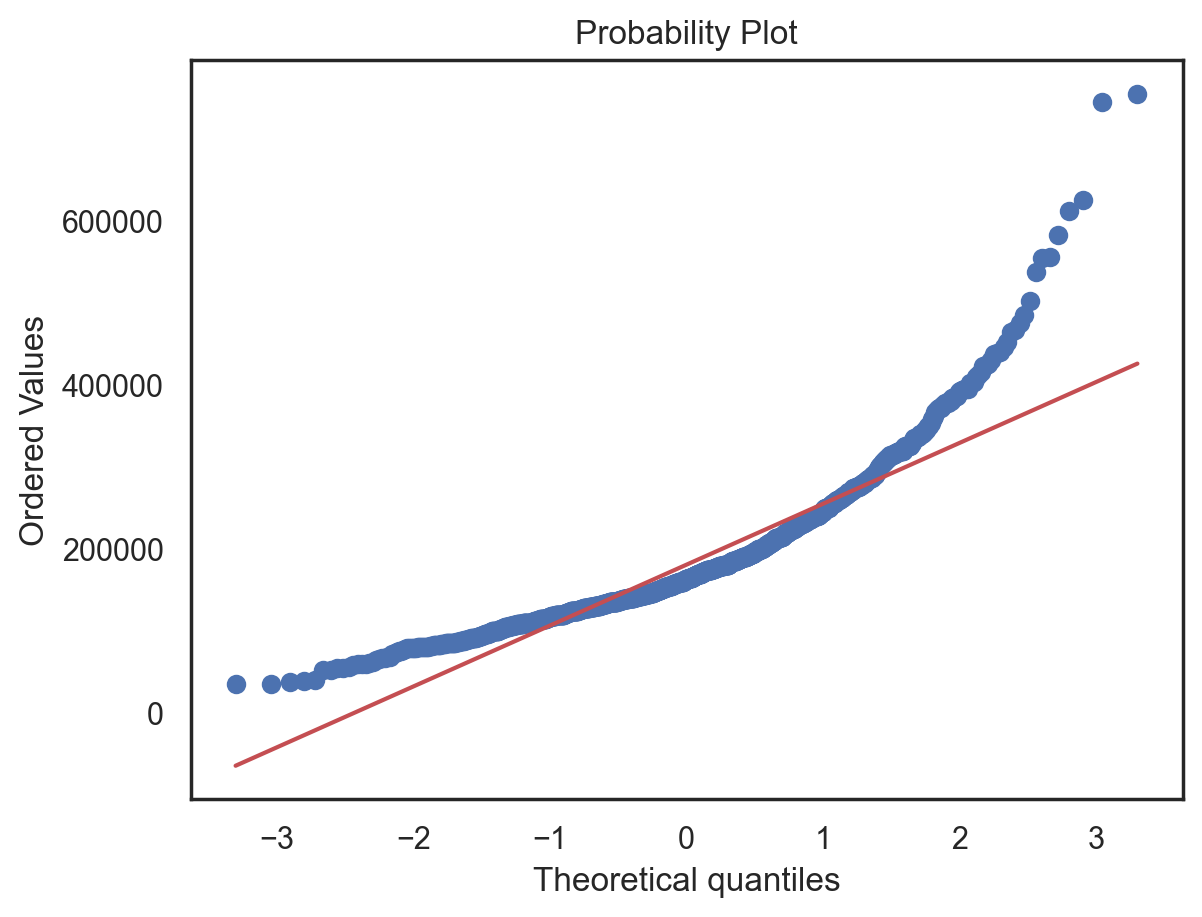

In [13]:
# Plotting the probability plot of 'SalePrice'
stats.probplot(train_data['SalePrice'], plot = plt)
plt.show()

In [14]:
# Displaying the skewness and kurtosis
print(f"Skewness: {train_data['SalePrice'].skew()}")
print(f"Kurtosis: {train_data['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


========> The distribution looks normal at first, but it’s not! The high kurtosis score shows a sharp peak, while the skewness score indicates that the sale prices are not evenly spread around the mean. We’ll need to adjust this to make our data more normal.

### **Step:-3. Multivariable Analysis**

- **Let's explore the relationship between 'SalePrice' and other features using correlation and plots.**
- **And check out all the variables! There are two types of features in housing data, categorical and numerical.**

In [30]:
# Displaying the list of categorical and numerical features
categorical_features = train_data.select_dtypes(include=['object'])
numerical_features = train_data.select_dtypes(include=['int64', 'float64'])

print(categorical_features.columns)
print(numerical_features.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Kitch

In [35]:
print(f'Total Features: {len(categorical_features.columns)} categorical + {len(numerical_features.columns)} numerical = {len(train_data.columns)} features')

Total Features: 43 categorical + 37 numerical = 80 features


**=======> With 81 features, it can be challenging to identify which ones are most related to house prices.** 

**A correlation matrix is a great tool for this. It helps us see the relationships between all the features and the target variable, "SalePrice", at a glance.**

##### **Let’s calculate the correlation matrix and visualize the top features most correlated with "SalePrice":**
  - A correlation matrix is a table that shows the correlation coefficients between multiple variables. 
  - Each cell in the matrix represents the correlation between two variables.
  - A correlation coefficient is a statistical measure that describes the strength and direction of a relationship between two variables. 
  - A heatmap is a data visualization tool that uses color to represent the magnitude of values in a matrix. It helps to quickly identify patterns, correlations, and outliers in complex data sets. 

In [37]:
# find the correlation matrix
corrmat = numerical_features.corr()
print(corrmat)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

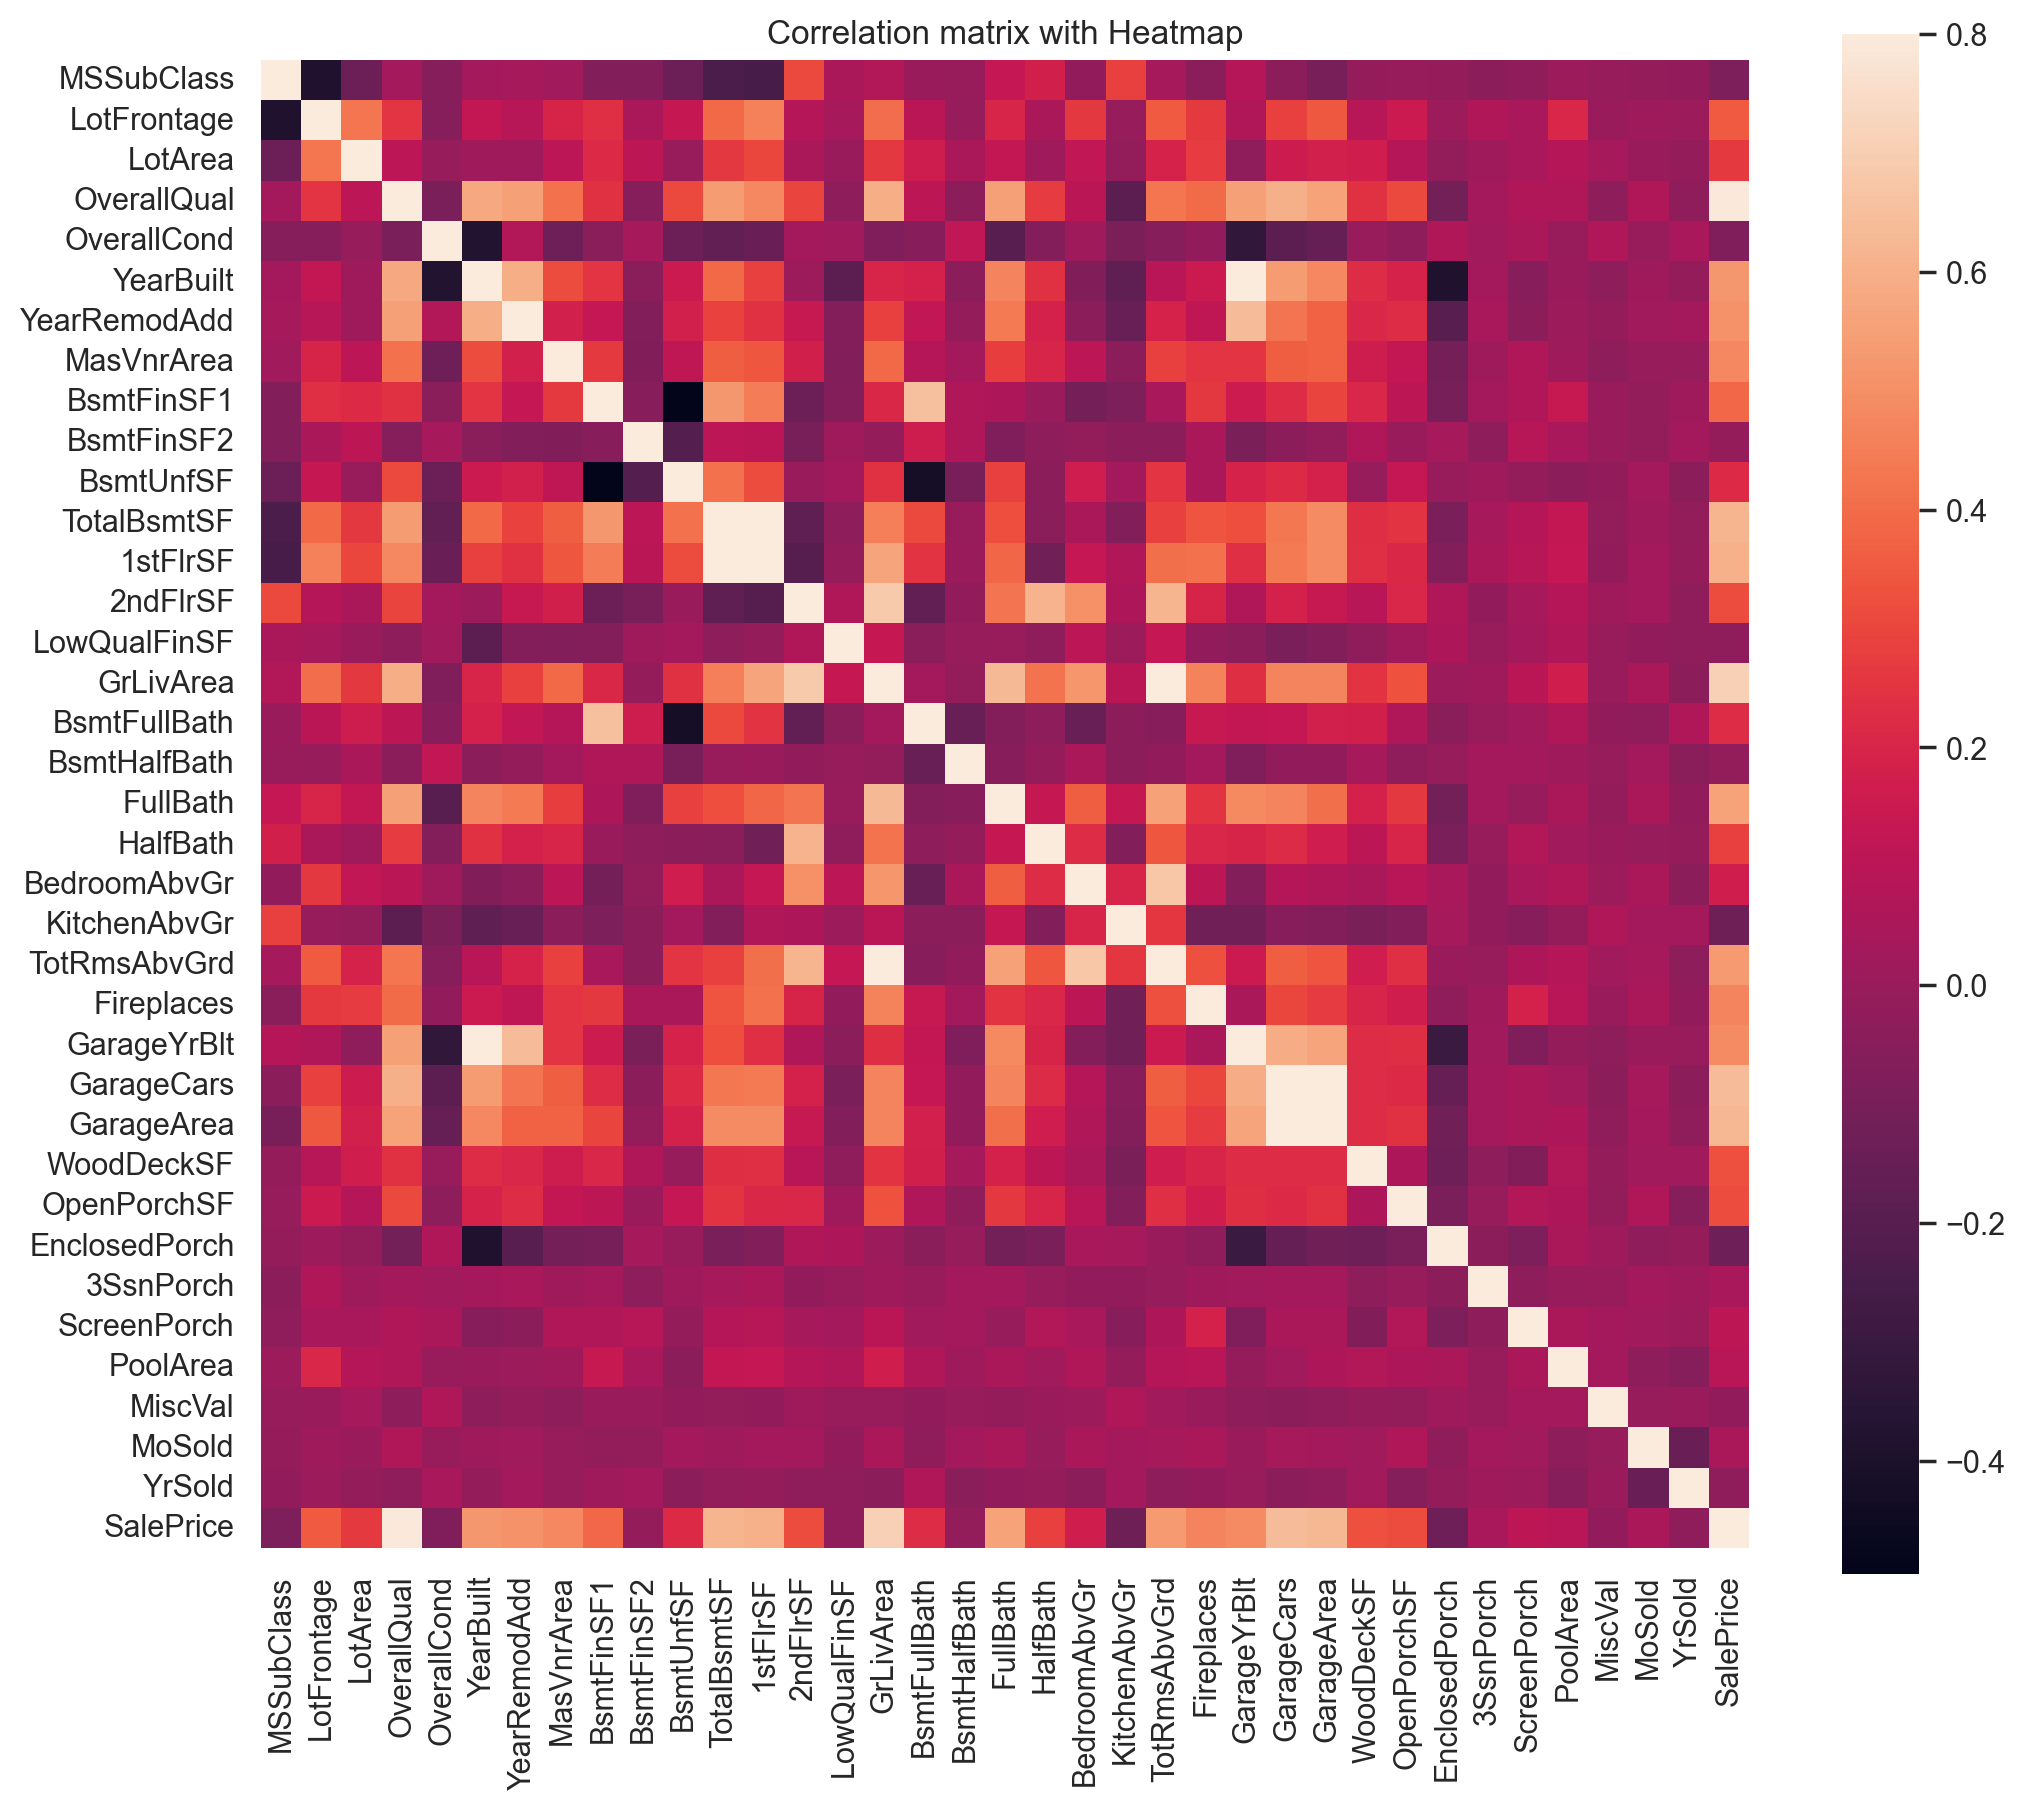

In [41]:
# corrmat: This is the correlation matrix that you want to visualize.
# vmax=.8: This sets the maximum value for the color scale. 
# Values in the correlation matrix greater than 0.8 will be represented by the same color.
# square=True: This ensures that each cell in the heatmap is square-shaped, making the heatmap look more organized and easier to interpret.

# Visualize the correlation matrix using a heatmap
corrmat = numerical_features.corr()
plt.figure(figsize = (12, 10))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.title("Correlation matrix with Heatmap")
plt.show()

**======> It’s a great summary, but wow, that’s a lot of information to look at. Let’s focus on the top 10 features most closely related to Sale Price.**

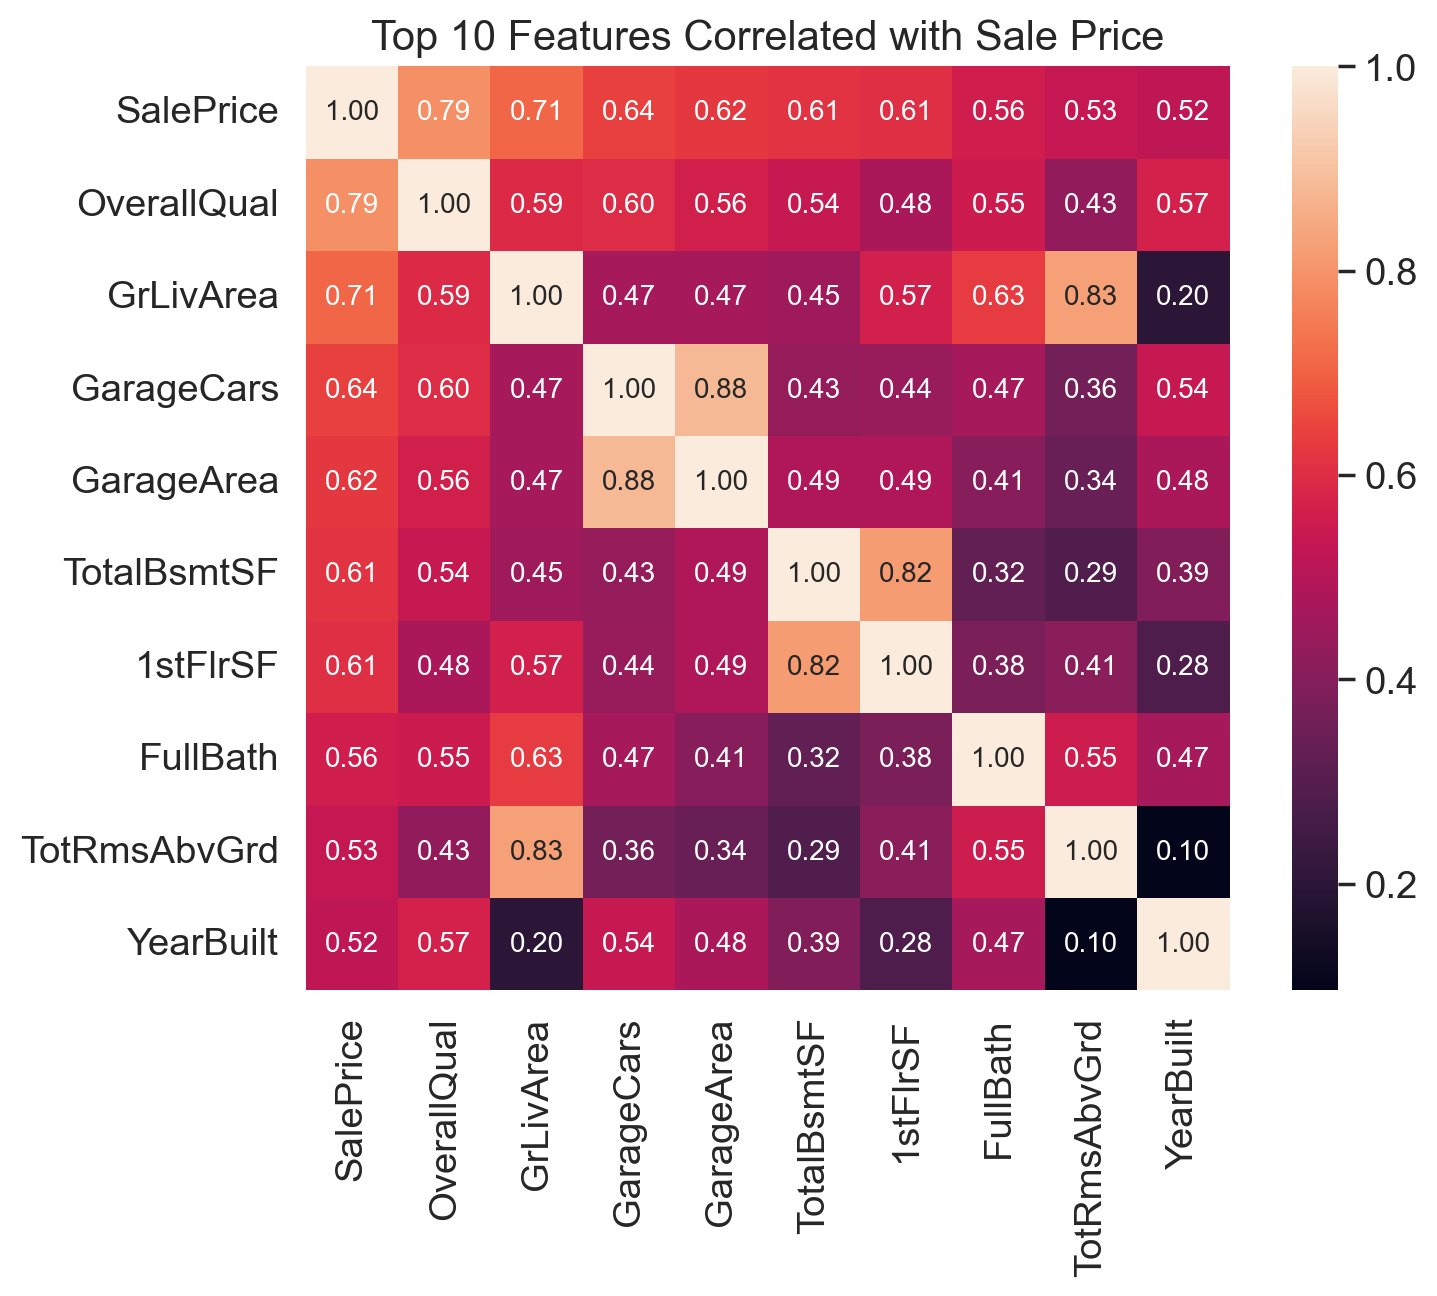

In [53]:
# Top 10 features most correlated with 'SalePrice'
k = 10

# Select the top k features most correlated with 'SalePrice'
top_features = corrmat.nlargest(k, "SalePrice")["SalePrice"].index

# Compute the correlation matrix for the selected features
top_corrmat = numerical_features[top_features].corr()

# Set the font scale for the heatmap
sns.set(font_scale=1.25)

plt.figure(figsize=(8, 6))

# Draw the heatmap with the correlation matrix
sns.heatmap(top_corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=top_features.values, xticklabels=top_features.values)
plt.title('Top 10 Features Correlated with Sale Price')
plt.show()

In [55]:
# print top ten correlated features with Sale Price
top_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

#### **Let’s examine how each feature relates to Sale Price and perform any necessary pre-cleaning on each one.**

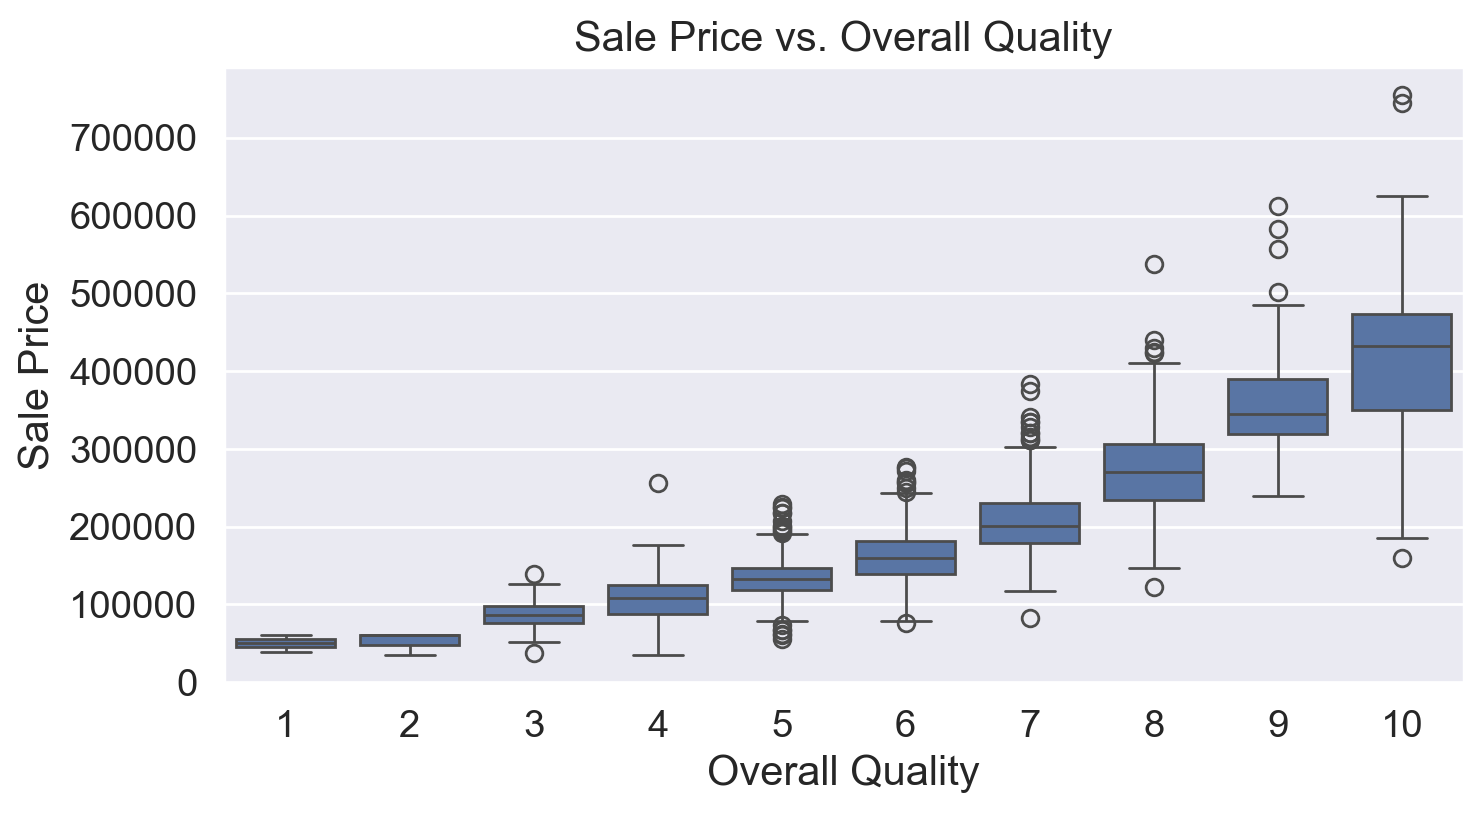

In [67]:
# Exploring the relationship between 'OverallQual' and 'SalePrice'
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('Sale Price vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

**=======> Haha, it's no surprise that better quality fetches a higher price! Nothing new here. Let's move on.**

In [83]:
# Define a function to plot a boxplot that show the relationship between target and other closest features
# A boxplot displays the distribution of data using a box and whiskers to show the minimum, first quartile (Q1), 
# median, third quartile (Q3), and maximum, helping to identify outliers and understand the data’s spread and skewness.
def plot_boxplot(x_feature, y_feature, title, xlabel, ylabel):
    plt.figure(figsize = (8, 4))
    sns.boxplot(x = train_data[x_feature], y = train_data[y_feature])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Define a function to plot jointplot that show the relationship between target and other closest features
# Jointplot is combines scatter plots and histograms (or other types of plots) to give a comprehensive view of the data.
def plot_jointplot(x_feature, y_feature, title, xlabel, ylabel, kind='reg'):
    sns.jointplot(x = train_data[x_feature], y = train_data[y_feature], kind = kind)
    plt.suptitle(title, y=1.02)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

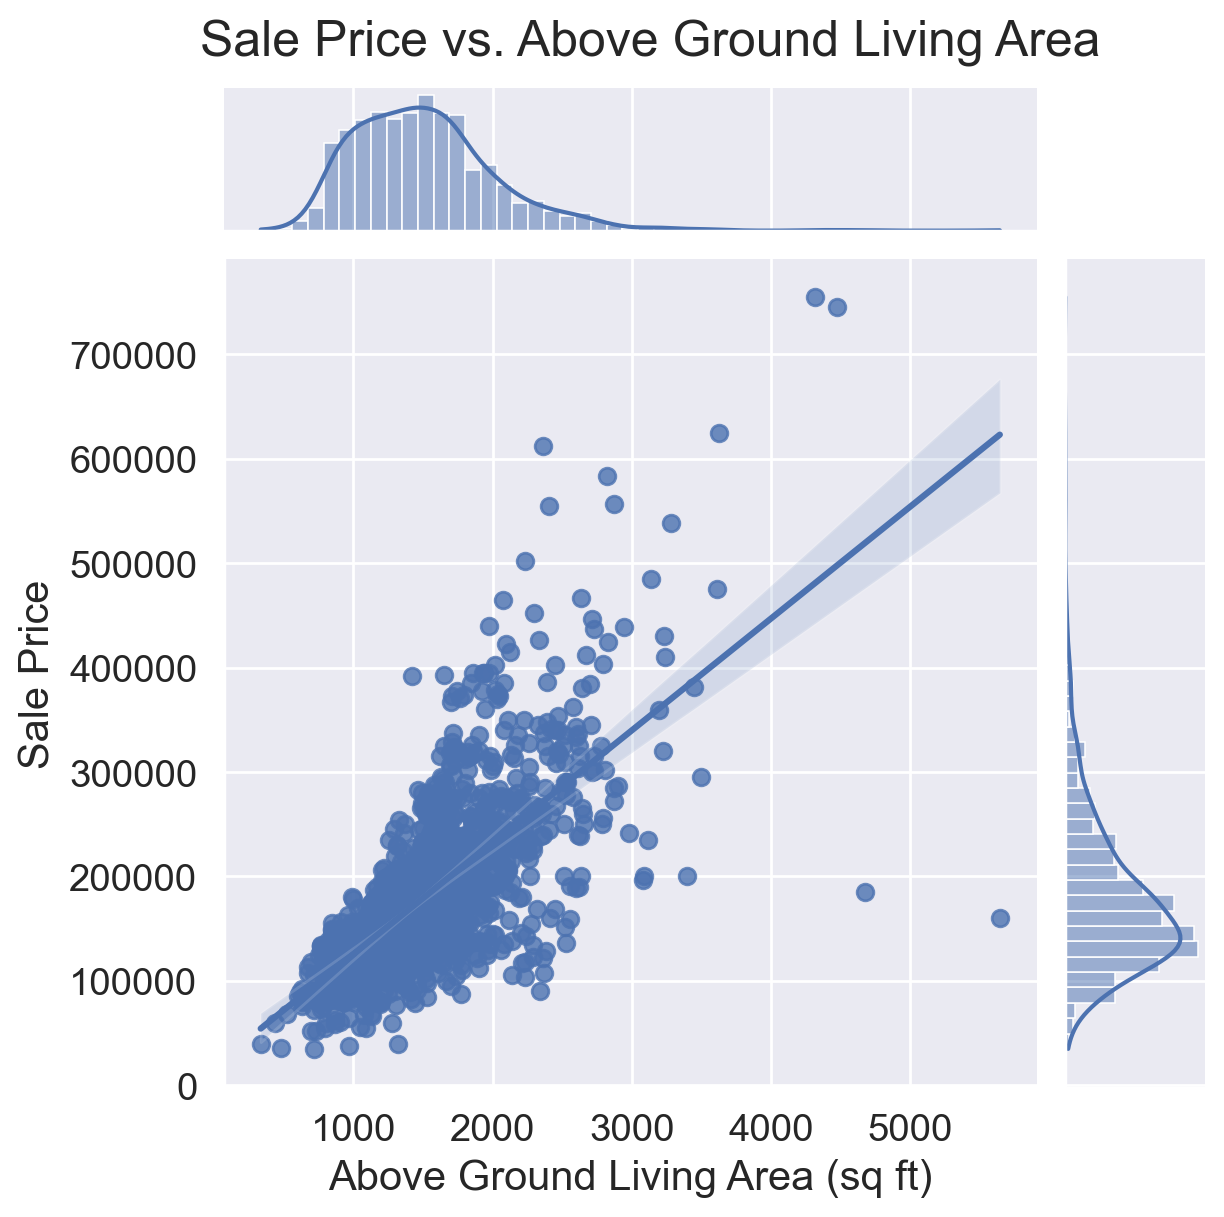

In [84]:
# Plotting 'GrLivArea' vs 'SalePrice'
plot_jointplot('GrLivArea', 'SalePrice', 'Sale Price vs. Above Ground Living Area', 'Above Ground Living Area (sq ft)', 'Sale Price')


**=======> It makes sense that people would pay more for a larger living area. However, those two outliers in the bottom-right of the plot don’t fit the pattern. Let’s remove these outliers manually to clean up our data. Ready to proceed?**

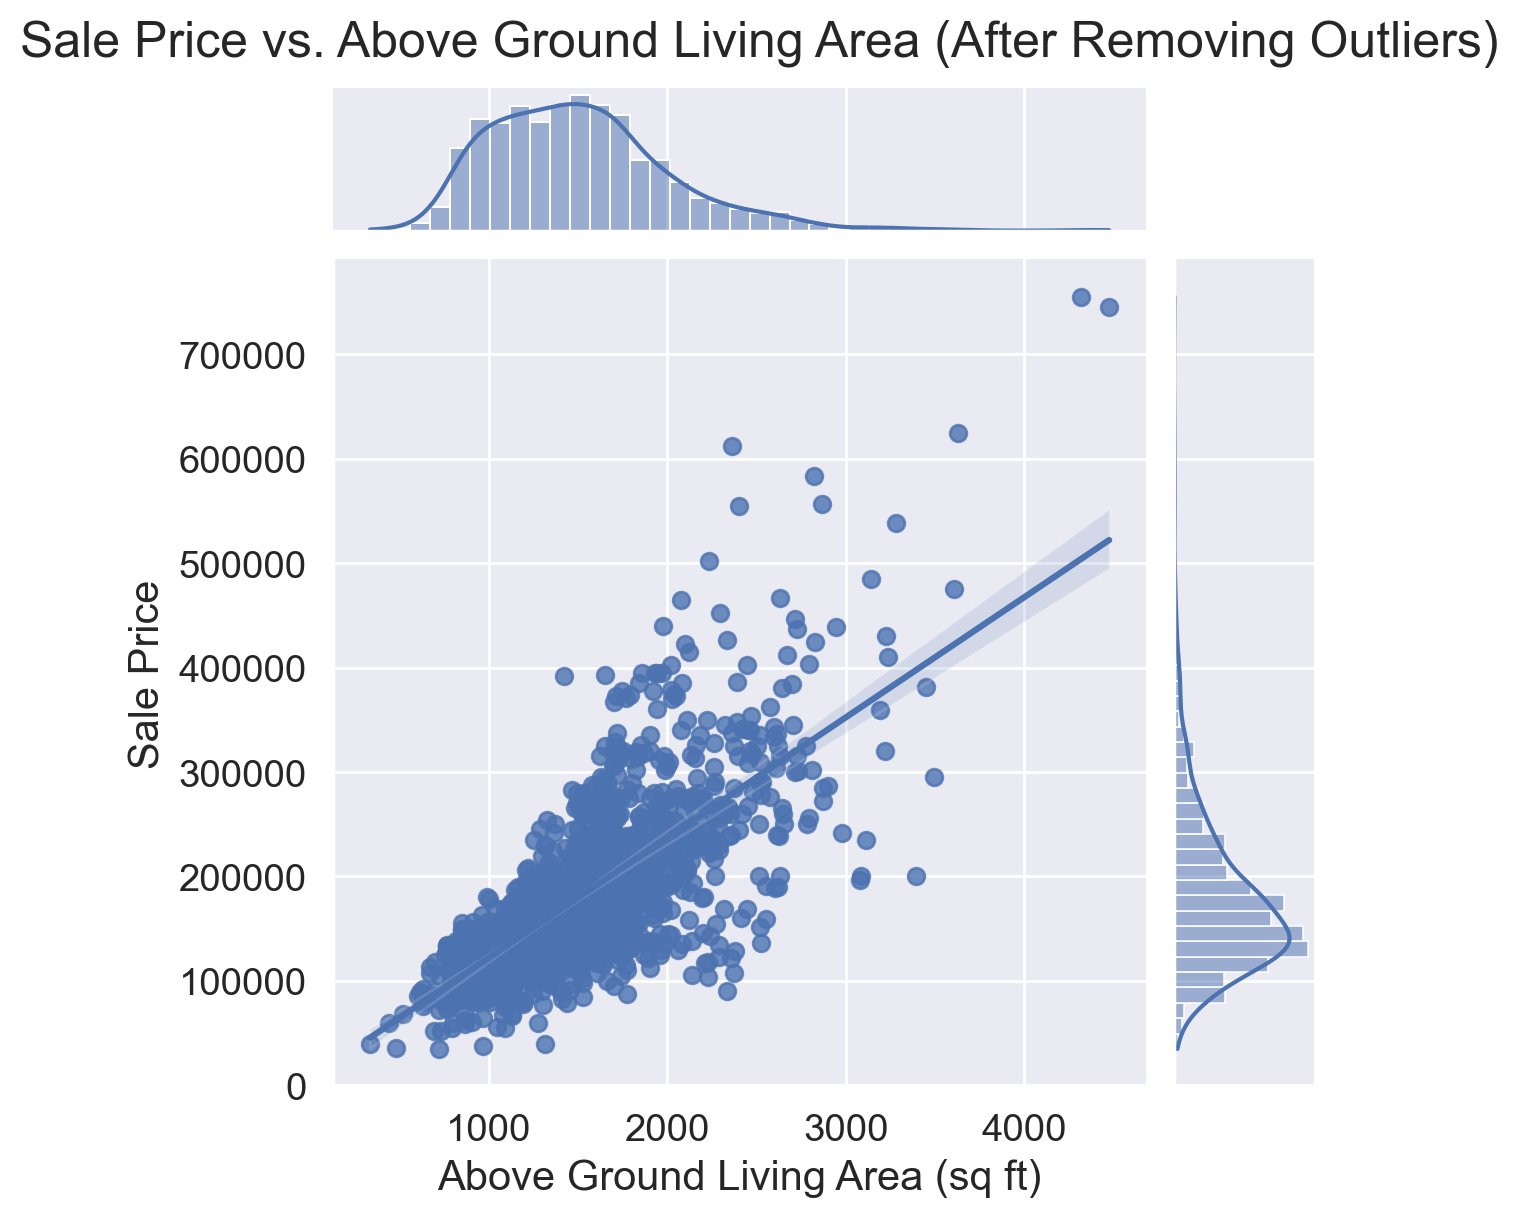

In [85]:
# Removing outliers based on 'GrLivArea'
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index).reset_index(drop=True)
plot_jointplot('GrLivArea', 'SalePrice', 'Sale Price vs. Above Ground Living Area (After Removing Outliers)', 'Above Ground Living Area (sq ft)', 'Sale Price')


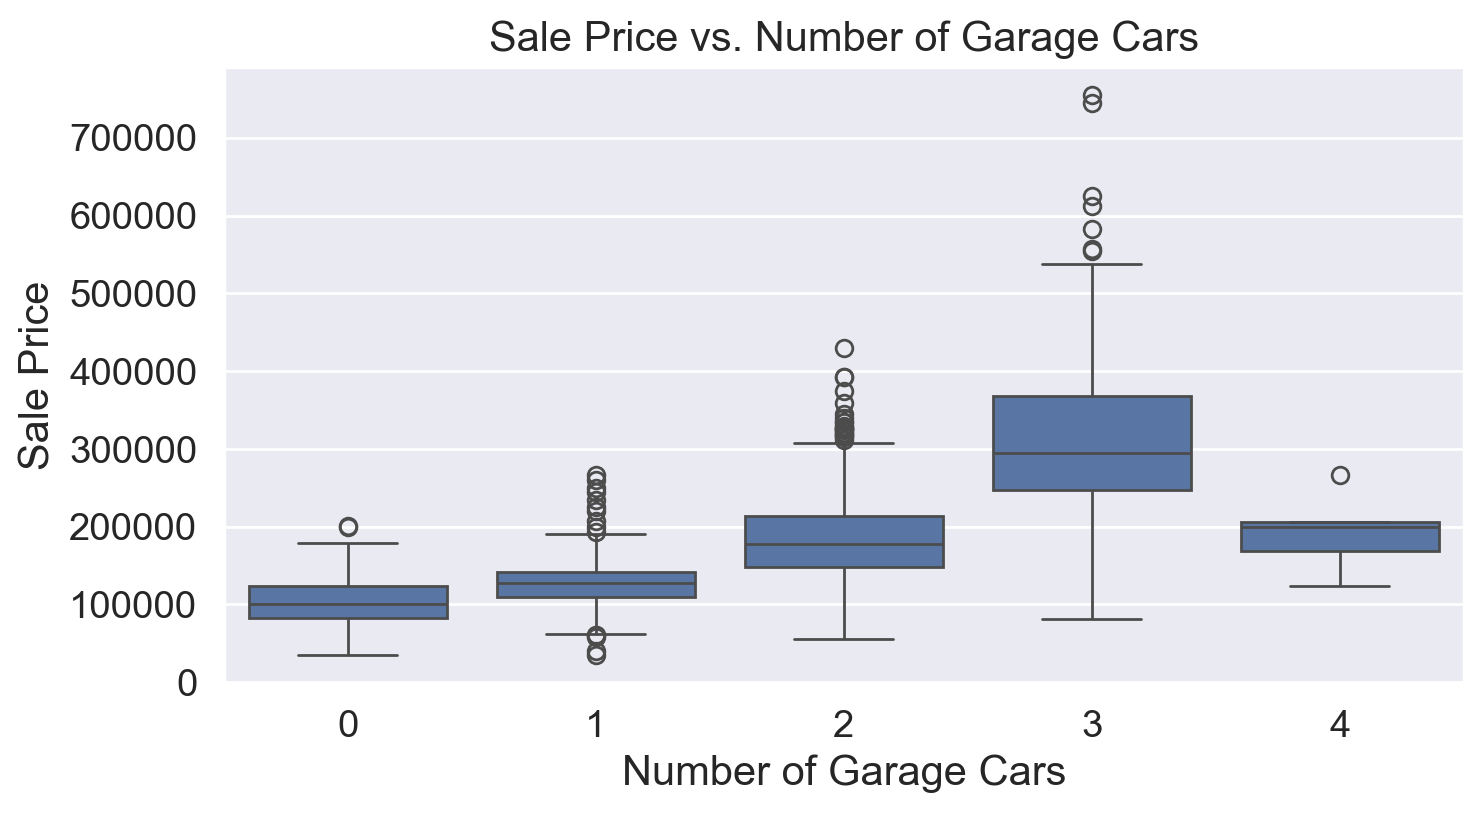

In [92]:
# Plotting 'GarageCars' vs 'SalePrice'
plot_boxplot('GarageCars', 'SalePrice', 'Sale Price vs. Number of Garage Cars', 'Number of Garage Cars', 'Sale Price')


**======> Let’s remove the entries where the garage size is 4 cars since they seem to lower the sale price.**

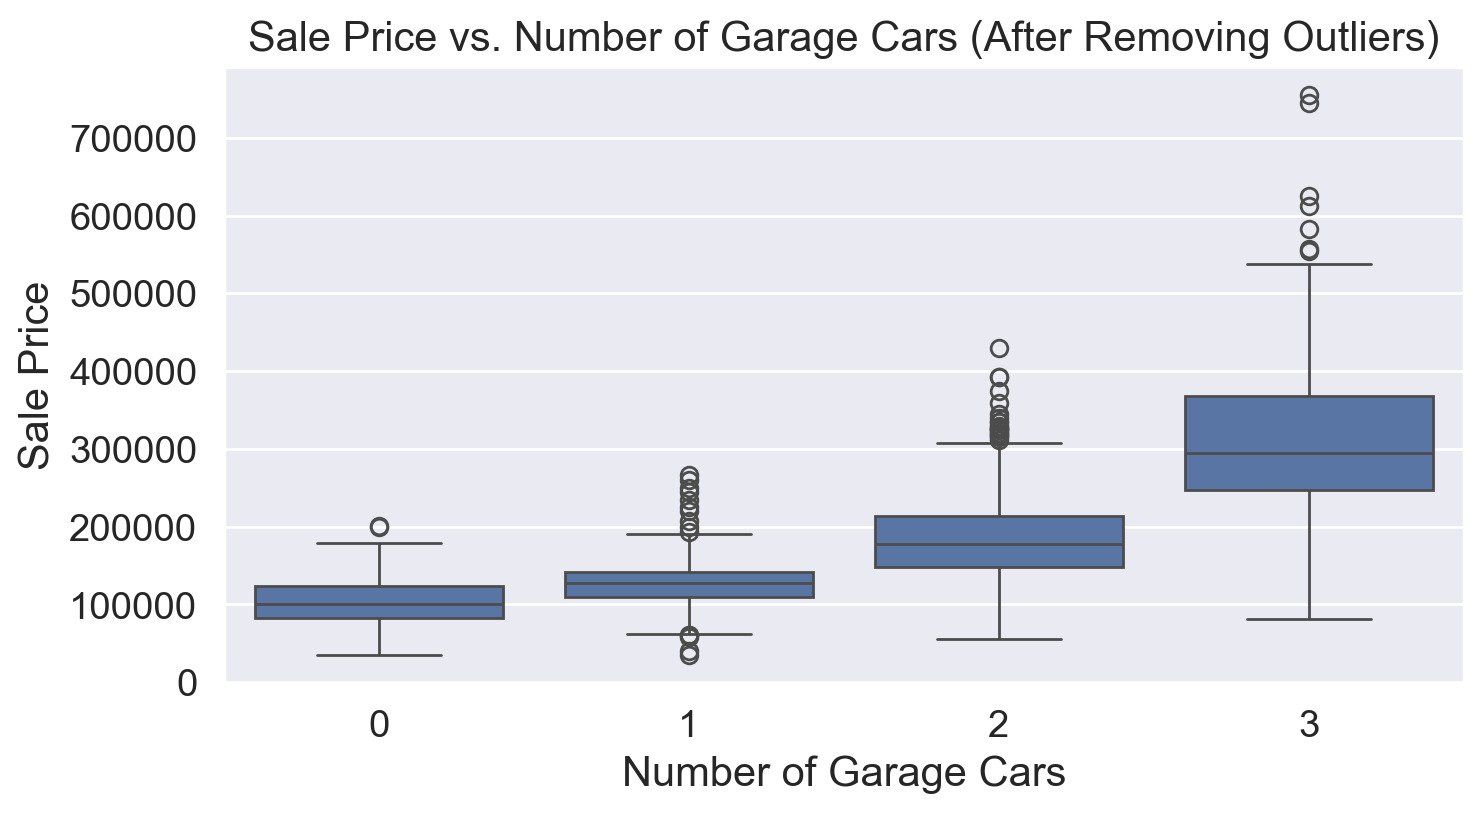

In [94]:
# Removing outliers based on 'GarageCars'
train_data = train_data.drop(train_data[(train_data['GarageCars'] > 3) & (train_data['SalePrice'] < 300000)].index).reset_index(drop=True)
plot_boxplot('GarageCars', 'SalePrice', 'Sale Price vs. Number of Garage Cars (After Removing Outliers)', 'Number of Garage Cars', 'Sale Price')


**======> That looks much better. Note: removal of data is totally discretionary and may or may not help in modeling. Use at your own preference.**

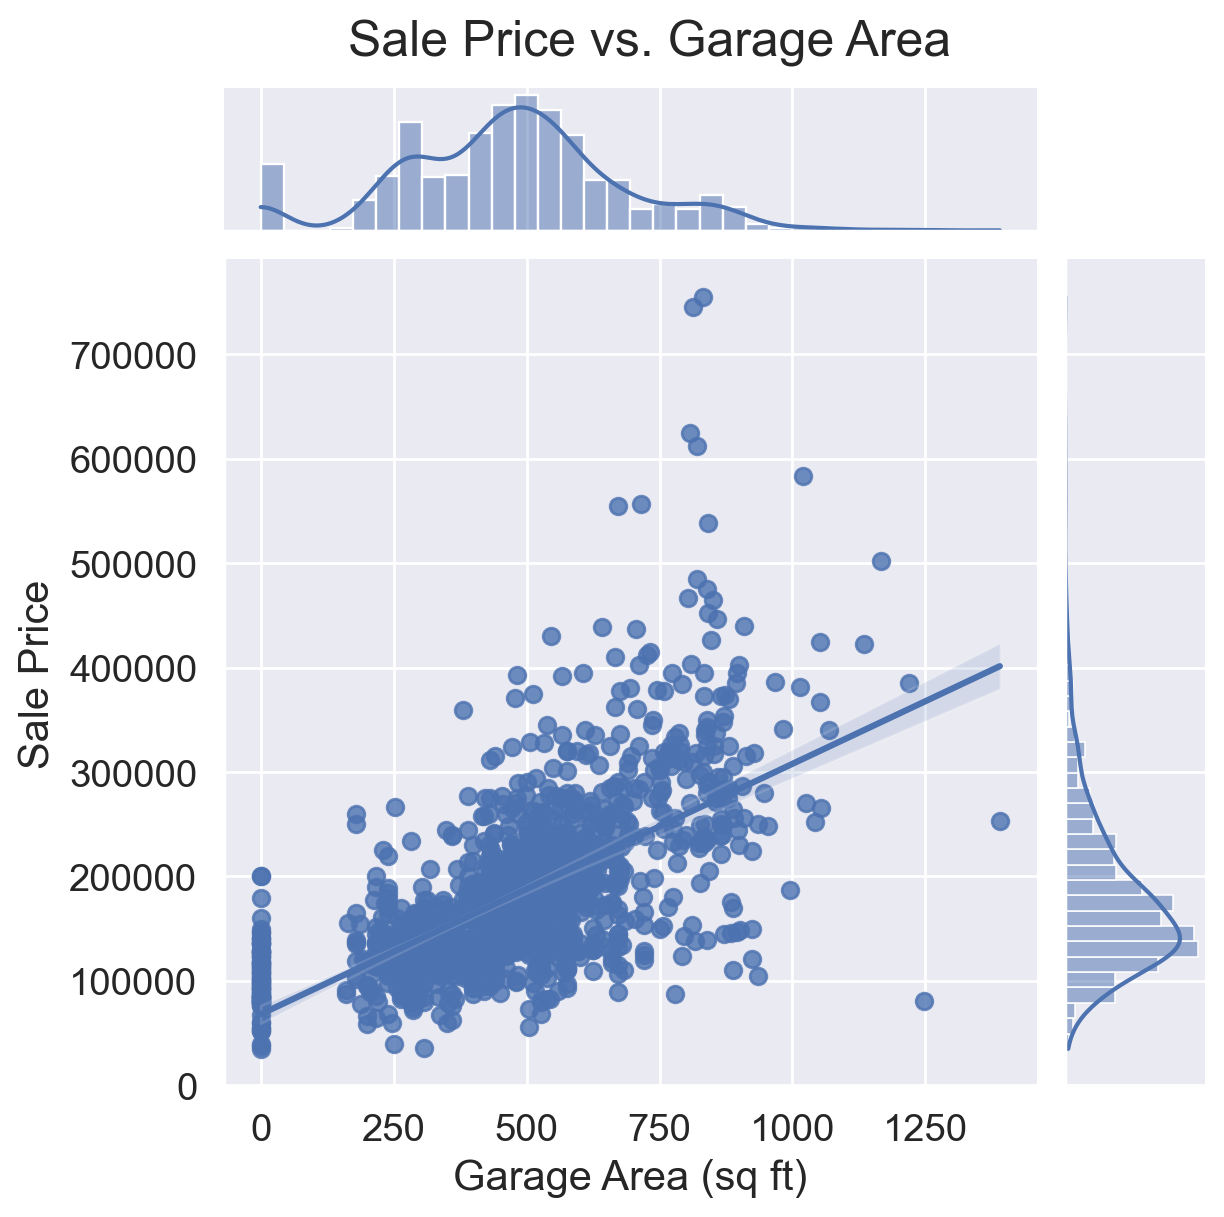

In [95]:
# Plotting 'GarageArea' vs 'SalePrice'
plot_jointplot('GarageArea', 'SalePrice', 'Sale Price vs. Garage Area', 'Garage Area (sq ft)', 'Sale Price')

**=====> Let’s exclude the last two entries from your dataset to clean it up.**

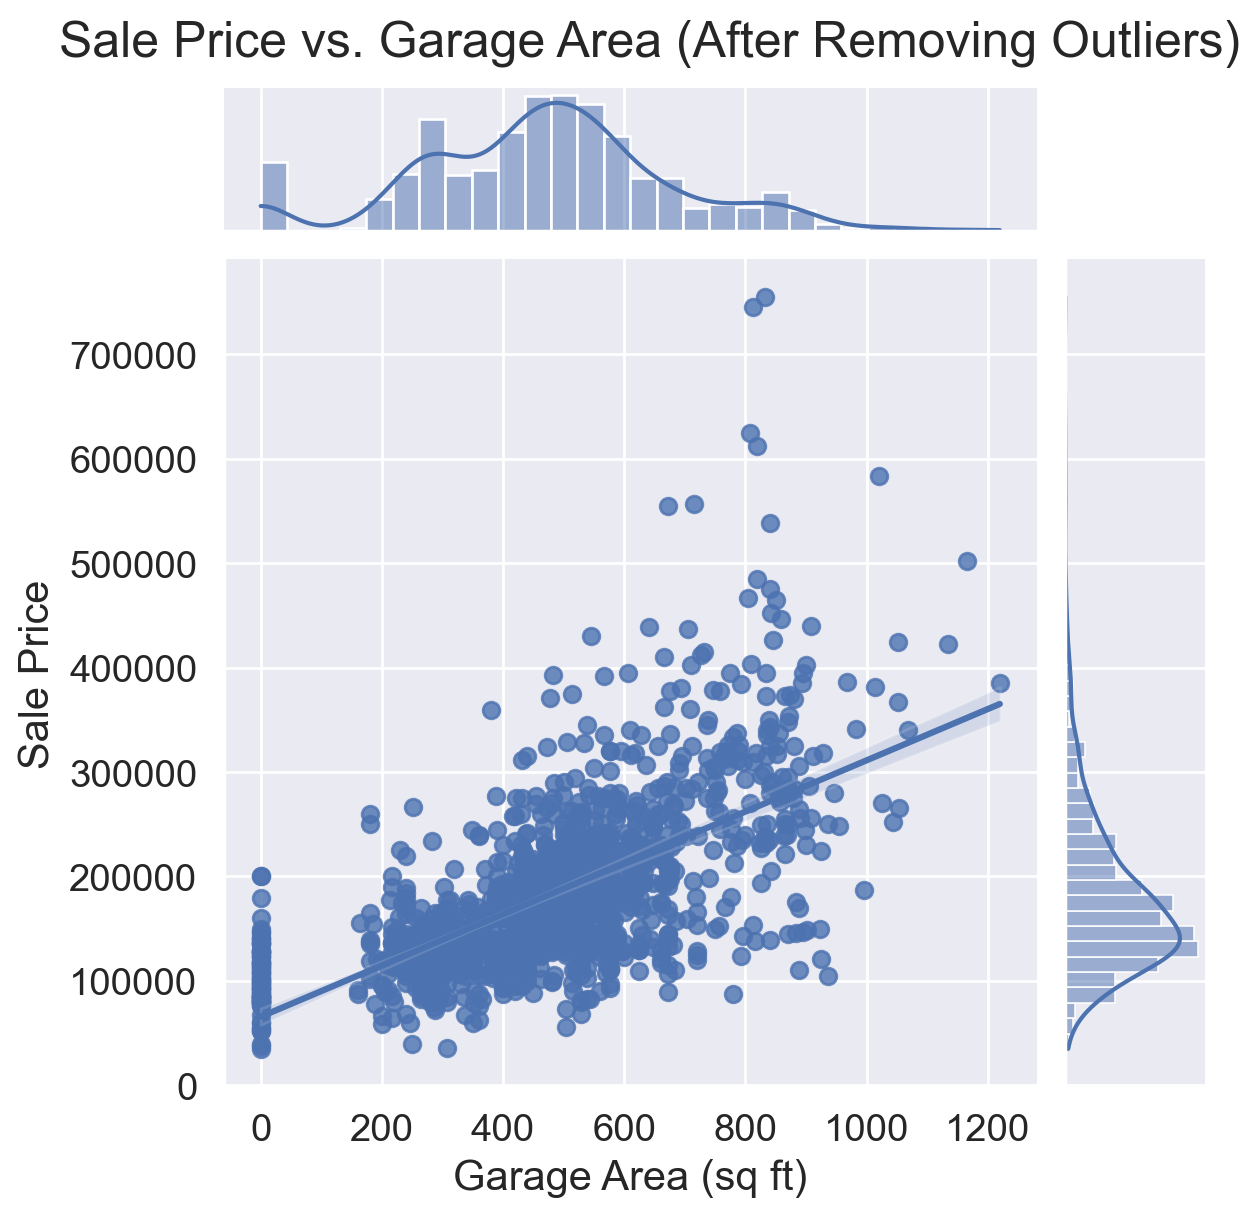

In [97]:
# Removing outliers based on 'GarageArea'
train_data = train_data.drop(train_data[(train_data['GarageArea'] > 1100) & (train_data['SalePrice'] < 300000)].index).reset_index(drop=True)
plot_jointplot('GarageArea', 'SalePrice', 'Sale Price vs. Garage Area (After Removing Outliers)', 'Garage Area (sq ft)', 'Sale Price')


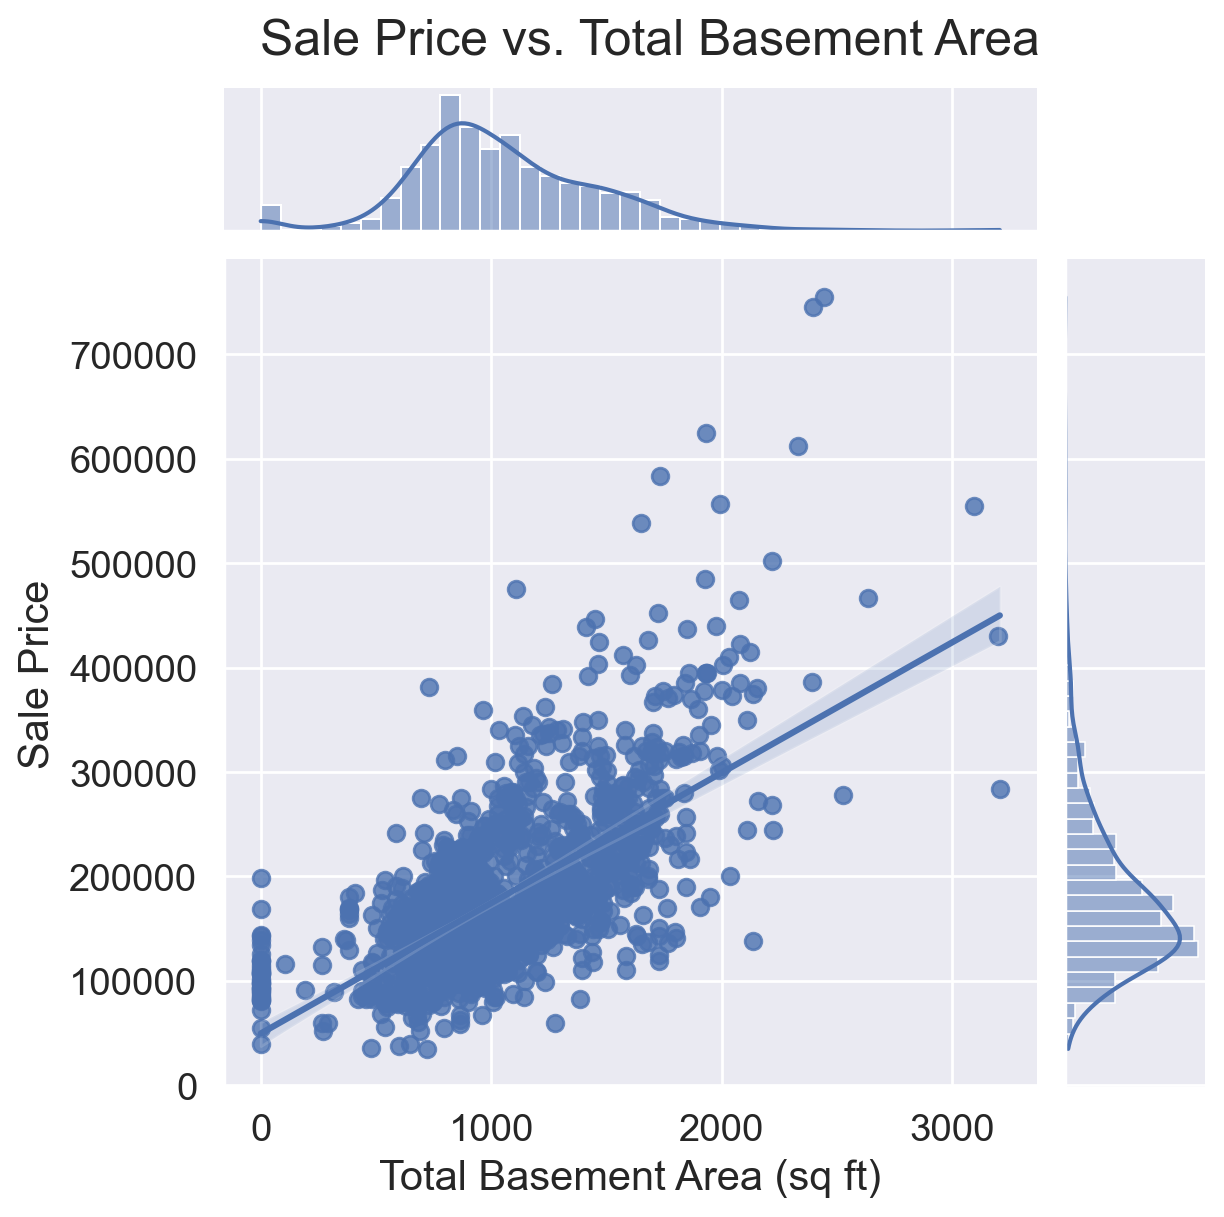

In [98]:
# Plotting 'TotalBsmtSF' vs 'SalePrice'
plot_jointplot('TotalBsmtSF', 'SalePrice', 'Sale Price vs. Total Basement Area', 'Total Basement Area (sq ft)', 'Sale Price')


**=====> Everything looks fine here.**

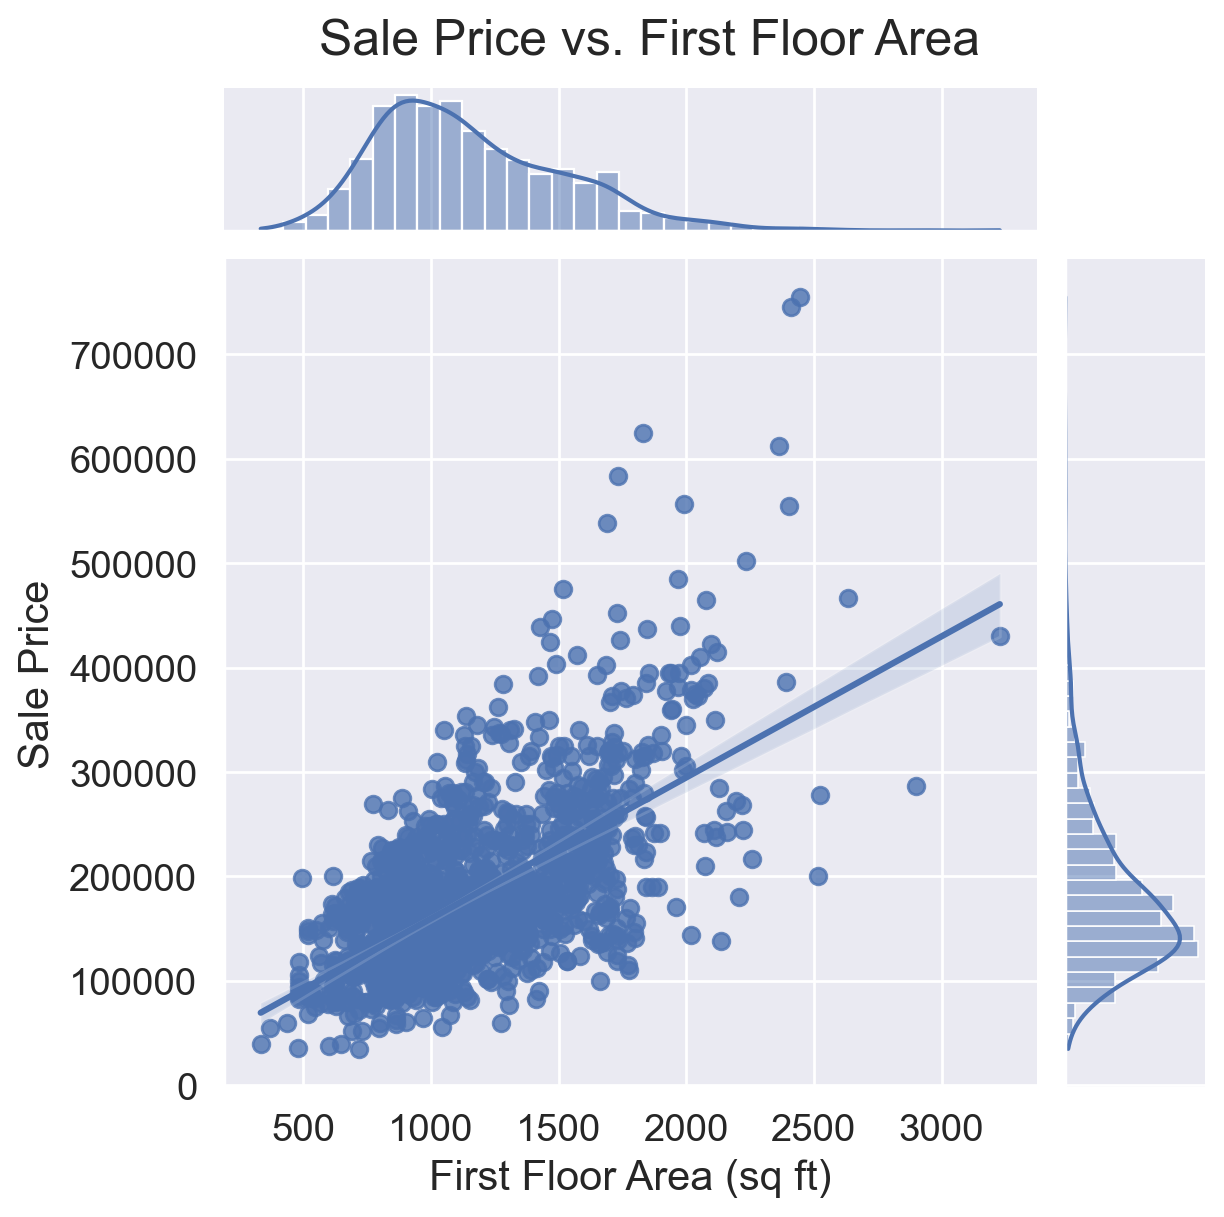

In [99]:
# Plotting '1stFlrSF' vs 'SalePrice'
plot_jointplot('1stFlrSF', 'SalePrice', 'Sale Price vs. First Floor Area', 'First Floor Area (sq ft)', 'Sale Price')


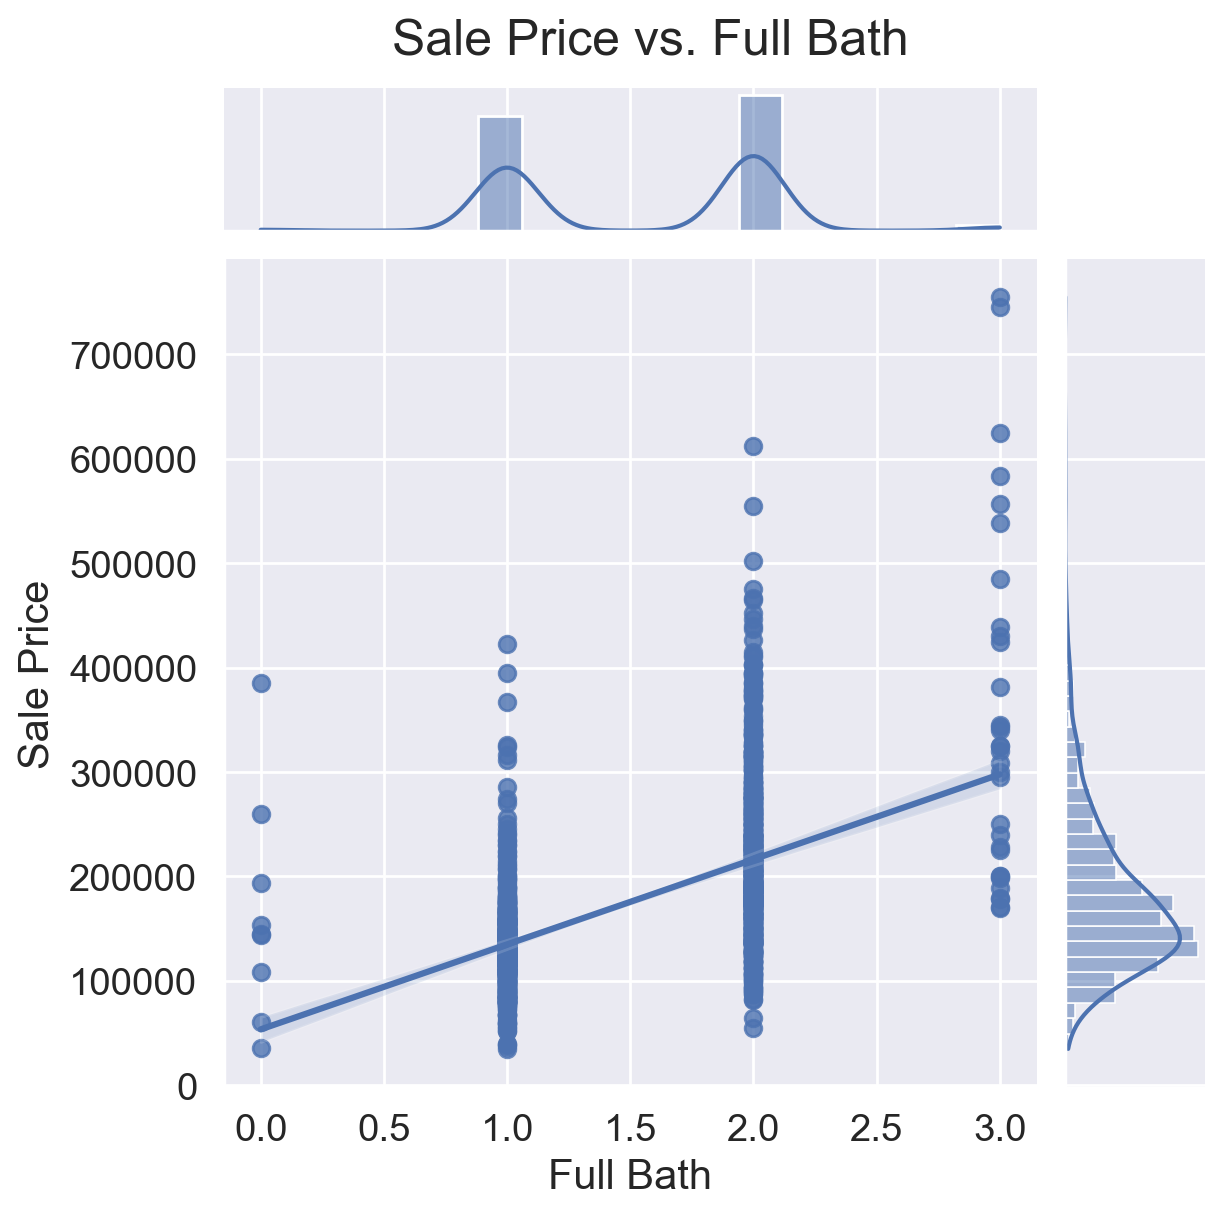

In [100]:
# plotting 'FullBath' vs 'SalePrice'
plot_jointplot('FullBath', 'SalePrice', 'Sale Price vs. Full Bath', 'Full Bath', 'Sale Price')

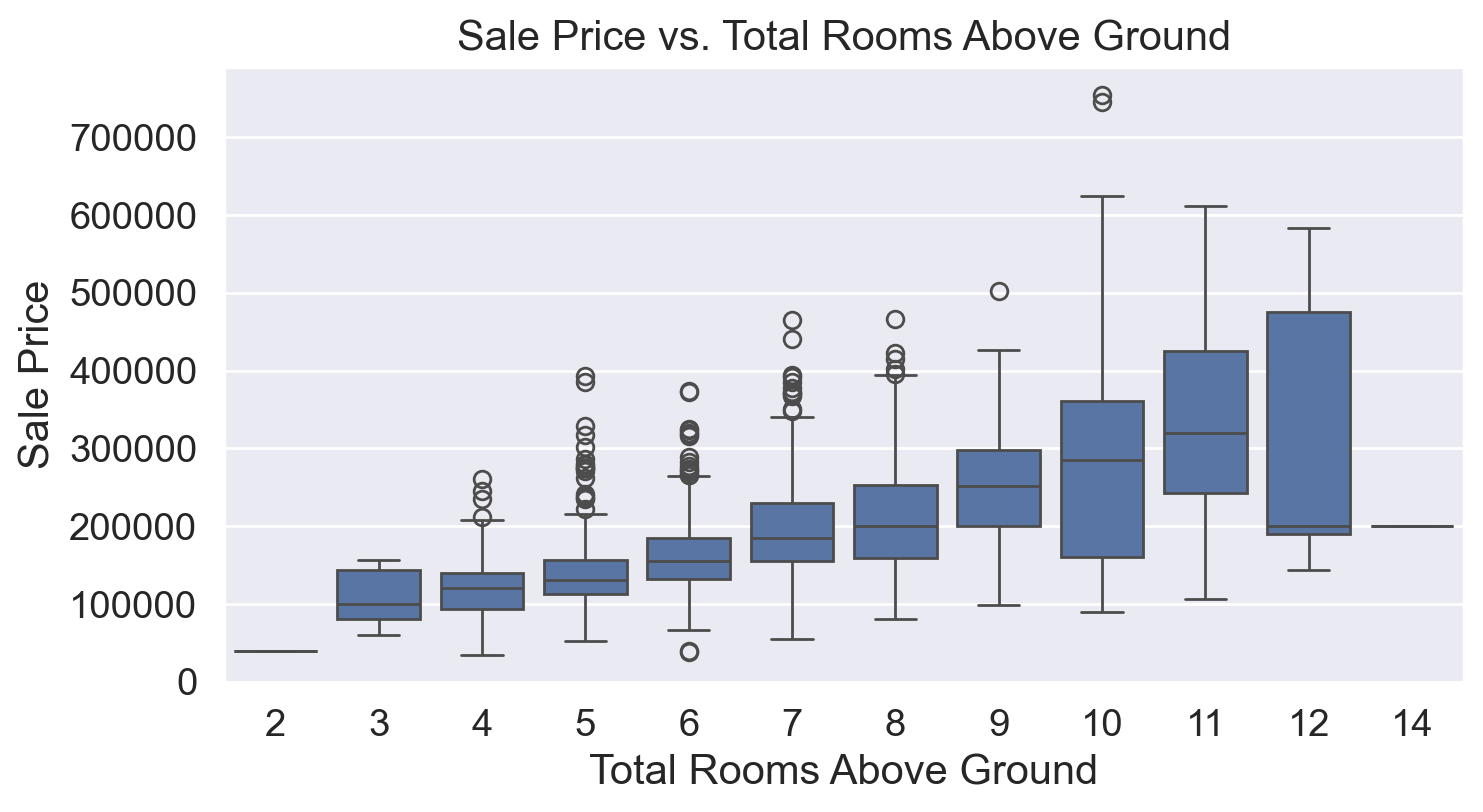

In [101]:
# Plotting 'TotRmsAbvGrd' vs 'SalePrice'
plot_boxplot('TotRmsAbvGrd', 'SalePrice', 'Sale Price vs. Total Rooms Above Ground', 'Total Rooms Above Ground', 'Sale Price')


**=====> It seems like houses with more than 11 rooms come with a $100k off coupon. It looks like an outlier but I'll let it slide.**

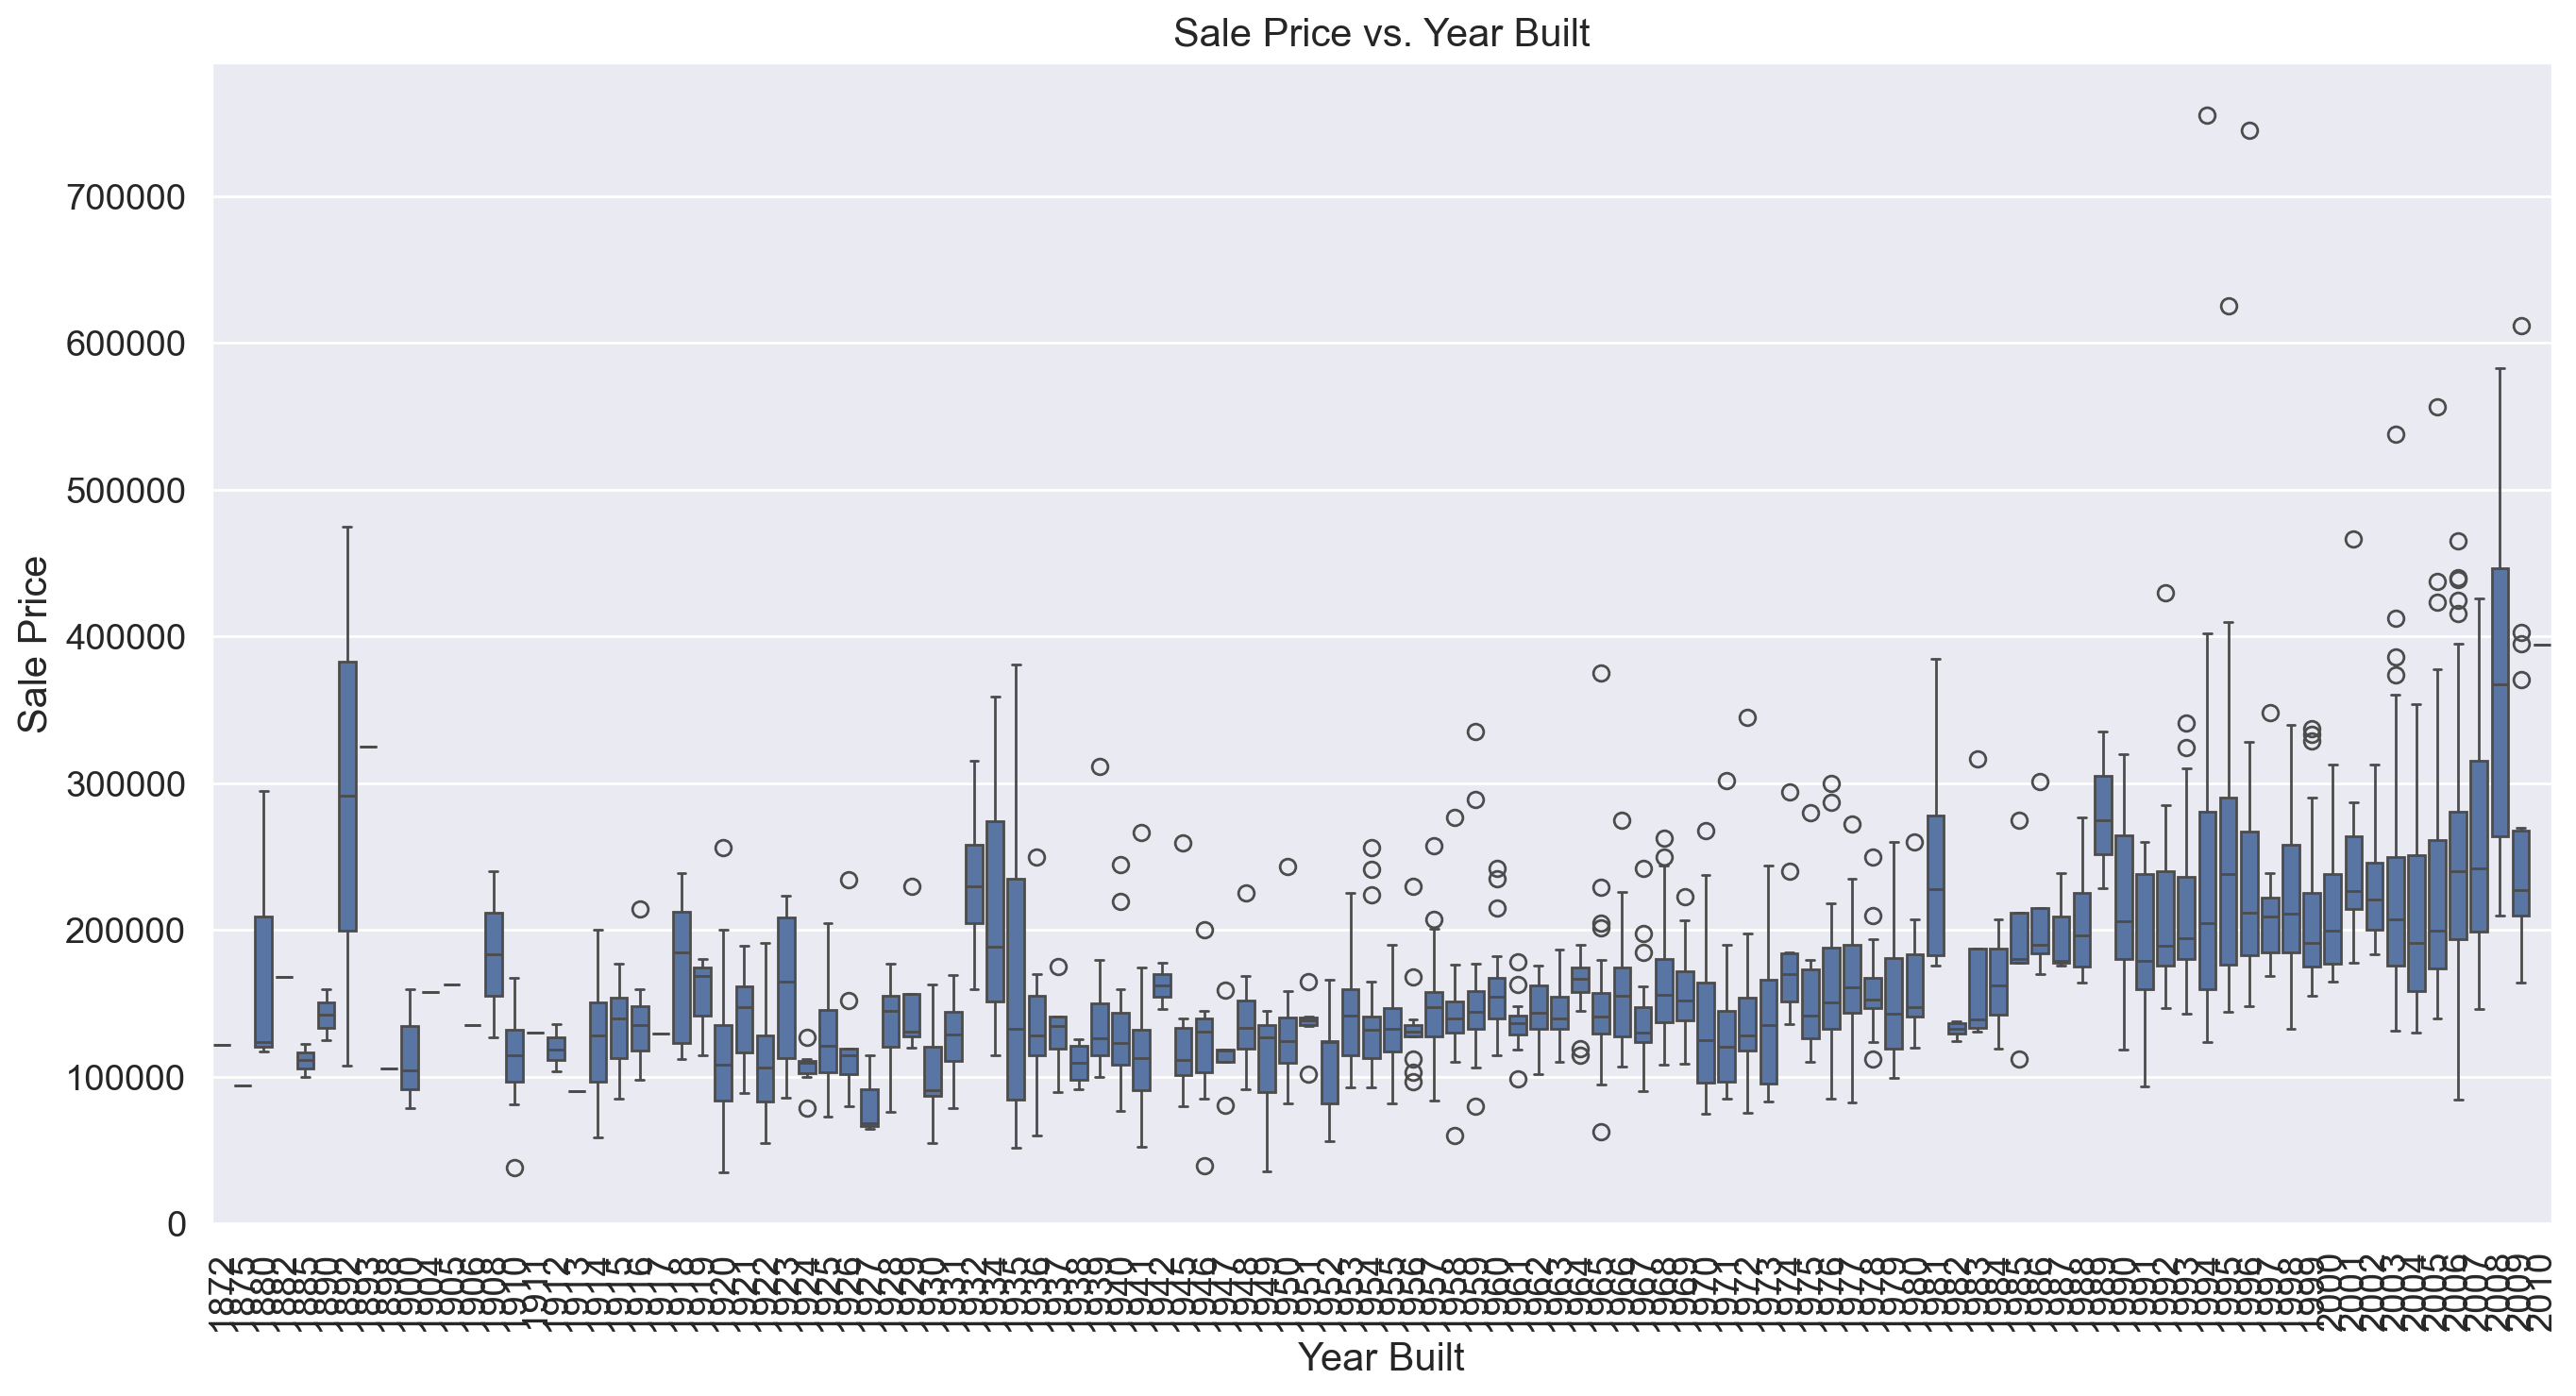

In [102]:
# Plotting 'YearBuilt' vs 'SalePrice'
plt.figure(figsize=(16, 8))
sns.boxplot(x=train_data['YearBuilt'], y=train_data['SalePrice'])
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

**=====> Although it seems like house prices decrease with age, we can't be entirely sure. Is it because of inflation or stock market crashes? Let's leave the years alone.**